<a href="https://colab.research.google.com/github/Nov05/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module4-clustering/Cell_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# modified by nov05 on 2019-06-20
# DS-Unit-1-Sprint-4-Linear-Algebra-master/
# module4-clustering/

### Lecture Notebook  
https://colab.research.google.com/drive/1RdTgMEEAJGVCu-jHpwoMvxuVeUJa993a  

In [0]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset.   
Because it has **labels** - The "diagnosis" column.      
However K-Means is not a sumpervised learning algorithm.    

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [17]:
target = df['diagnosis']
data = df.drop(['id', 'diagnosis','Unnamed: 32'], axis=1)
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [18]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [19]:
target.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

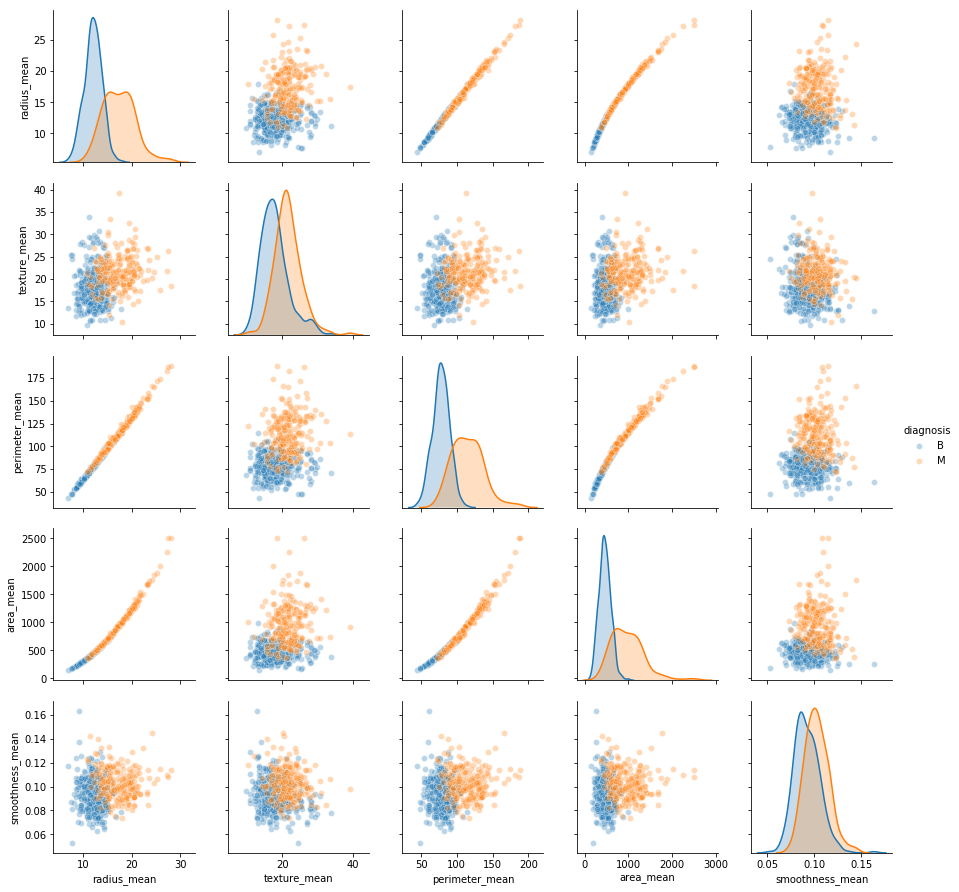

In [20]:
##### Your Code Here #####
sns.pairplot(df.iloc[:,1:7], 
             hue='diagnosis', hue_order=['B', 'M'],
             plot_kws={'alpha':0.3}
            );

In [21]:
# PCA
data_st = StandardScaler().fit_transform(data)
pca = PCA(n_components=30)
pca.fit(data_st)
data_pca = pca.fit_transform(data_st)

print("number of components:", len(pca.explained_variance_))
print(pca.explained_variance_, '\n')
print(pca.explained_variance_ratio_, '\n')
print(pca.explained_variance_ratio_.cumsum())

number of components: 30
[1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 3.12142606e-02
 3.00256631e-02 2.74877113e-02 2.43836914e-02 1.80867940e-02
 1.55085271e-02 8.19203712e-03 6.91261258e-03 1.59213600e-03
 7.50121413e-04 1.33279057e-04] 

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06] 

[0.44272026 0.63243208 0.72636371 0.79238506 0.847342

In [22]:
pipeline = Pipeline([('scaling', StandardScaler()), 
                     ('pca', PCA(n_components=6))])
data_pca = pipeline.fit_transform(data)
data_pca = pd.DataFrame(data_pca)
data_pca.head(2)

,0,1,2,3,4,5
0,9.192837,1.948583,-1.123166,3.633730,-1.195111,1.411423
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028657


In [23]:
# add target column for data visualization
data_pca['diagnosis'] = target
data_pca.head(2)

,0,1,2,3,4,5,diagnosis
0,9.192837,1.948583,-1.123166,3.633730,-1.195111,1.411423,M
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028657,M


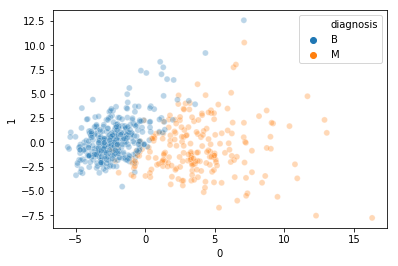

In [24]:
sns.scatterplot(x=0, y=1, data=data_pca, 
                hue='diagnosis', hue_order=['B','M'],
                alpha=0.3
               );

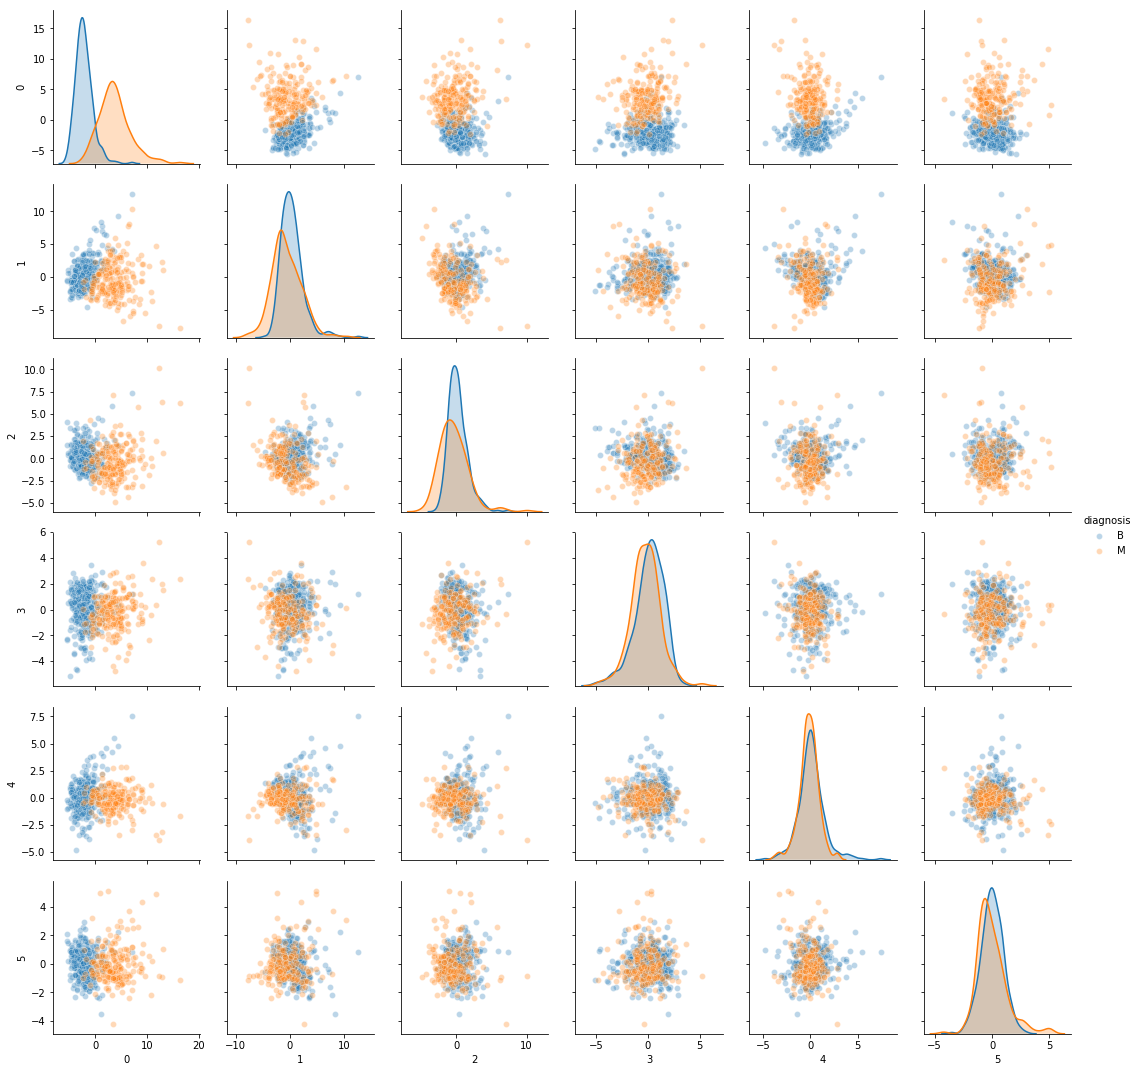

In [25]:
# 6-component PCA
sns.pairplot(data_pca, 
             hue='diagnosis', hue_order=['B', 'M'],
             plot_kws={'alpha':0.3});

In [26]:
data_pca.drop('diagnosis', axis=1, inplace=True)
data_pca.head(2)

,0,1,2,3,4,5
0,9.192837,1.948583,-1.123166,3.633730,-1.195111,1.411423
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028657


# Using library

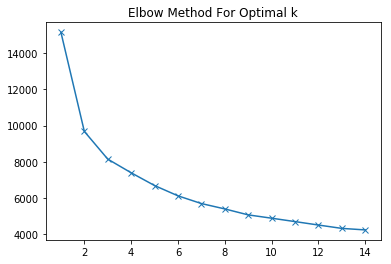

In [27]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_pca)
    sum_of_squared_distances.append(km.inertia_)
plt.plot(K, sum_of_squared_distances, marker="x")
plt.title('Elbow Method For Optimal k');

In [40]:
k = 2
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_pca)
labels = kmeans.labels_
print(labels[:100])

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1]


true benign: 0.5992970123022847 
true malignant: 0.3110720562390158 
overall accuracy: 0.9103690685413005


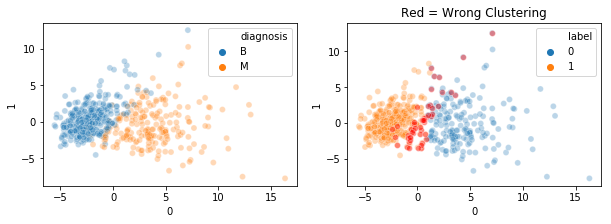

In [43]:
data_pca['diagnosis']=target
data_pca['label']=labels

# true negtive, true positive
true_B = (data_pca[(data_pca['diagnosis']=='B') & 
                   (data_pca['label']==1)].shape[0]
          / data_pca.shape[0])
true_M = (data_pca[(data_pca['diagnosis']=='M') & 
                   (data_pca['label']==0)].shape[0]
          / data_pca.shape[0])
print('true benign:', true_B,
      '\ntrue malignant:', true_M,
      '\noverall accuracy:', true_B+true_M)

fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.scatterplot(x=0, y=1, data=data_pca, 
                hue='diagnosis', hue_order=['B','M'],
                alpha=0.3, ax=ax[0]
               );
sns.scatterplot(x=0, y=1, data=data_pca, 
                hue='label', hue_order=[0, 1],
                alpha=0.3, ax=ax[1]
               );
# plot wrong data points
condition = (((data_pca['diagnosis']=='B') & 
              (data_pca['label']==0)) |
             ((data_pca['diagnosis']=='M') & 
              (data_pca['label']==1))
            )
sns.scatterplot(x=0, y=1, data=data_pca[condition], 
                color='r', alpha=0.4, ax=ax[1]
               );
ax = plt.gca()
ax.set_title("Red = Wrong Clustering");

data_pca.drop(['diagnosis', 'label'], axis=1, inplace=True)

# Iterate by Hand (Code My Own K-Means Function)

In [30]:
center = [data_pca[col].mean() for col in data_pca]
centroids = []
centroids.append(data_pca.sample(k).values)
print(center)
print(centroids[0][0])
print(centroids[0][1])

[-2.544342397383487e-16, -9.13153559797141e-17, 1.40485163045714e-17, 9.209582910774585e-17, -2.868238745516661e-17, -5.1120989886079265e-17]
[ 2.10780123  1.12197395  1.77515824  0.26267538 -0.96081116  0.05685021]
[ 2.61148489  1.56142171 -0.21818696 -0.49277559  1.10438716  0.00581814]


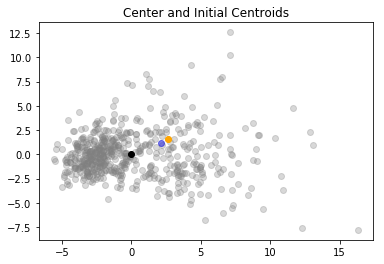

In [31]:
plt.scatter(data_pca[0], data_pca[1], color='gray', 
            alpha=0.3)
plt.plot(center[0], center[1], "ok")
plt.plot(centroids[0][0][0], centroids[0][0][1], 
         marker="o", color="blue", alpha=0.4)
plt.plot(centroids[0][1][0], centroids[0][1][1], 
         marker="o", color="orange")
plt.title("Center and Initial Centroids")
plt.show()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html  

In [0]:
def distance(p1, p2):
    return(sum((x-y)**2 for x,y in zip(p1,p2))**0.5)

def cluster(p, centroids):
    return(np.argmin([distance(p, c) for c in centroids]))

########################################################
#                 K-Means Clustering
########################################################
def kmeans(df, k=2, iterate=300):
  
    colnum = df.shape[1]
  
    # initial centroids
    centroids = []
    centroids.append(df.sample(k).values)
  
    # find new centroids
    for i in range(iterate):
        colname = "c" + str(i)
        df[colname] = (df.iloc[:,:colnum]
                         .apply(cluster, 
                                centroids=centroids[i],
                                axis=1))
        means = []
        for j in range(k):
            subset = df[df[colname]==j].iloc[:,:colnum]
            means.append([subset[col].mean() for col in subset])
    
        means = np.array(means)
        if np.array_equal(centroids[-1], means): 
            break
        else:
            centroids.append(means)
      
    return(centroids, df)
########################################################

In [33]:
print(distance(centroids[0][0], centroids[0][1]))
print(cluster(center, centroids[0]))
print(cluster([9]*6, centroids[0]))

3.042793321996536
0
1


In [34]:
data_pca = data_pca.iloc[:,:6]
c, _ = kmeans(df=data_pca)
print(len(c))
print(c[0])
data_pca.sample(10)

7
[[-4.08707736 -0.48471008  0.631364   -3.40273316 -0.01822446 -0.30982253]
 [-2.56011502 -2.49404545  0.1703126  -2.10975607  0.97923894  0.48875632]]


,0,1,2,3,4,5,c0,c1,c2,c3,c4,c5,c6
173,-3.483986,1.619692,2.675469,1.253613,-0.598981,-1.343879,0,0,0,0,0,0,0
496,-0.229395,1.515903,-2.216283,0.555570,0.251202,-0.602561,1,1,1,0,0,0,0
511,-2.767436,-2.161049,-0.021096,1.610276,0.716379,0.033010,1,1,0,0,0,0,0
269,-0.739743,3.152521,1.469858,-0.314894,0.947689,-0.531442,0,0,0,0,0,0,0
420,-2.014915,0.778452,0.125579,-0.659735,-0.021930,0.689322,1,0,0,0,0,0,0
35,2.766369,-0.354356,-1.896963,-0.534256,-0.884021,2.011036,1,1,1,1,1,1,1
211,-2.998711,-0.396778,-0.596466,-0.208045,0.568360,-0.372786,1,0,0,0,0,0,0
189,-3.357304,-1.103732,0.152090,0.828188,0.734259,0.692627,1,0,0,0,0,0,0
33,4.990603,-1.132589,-2.577384,-1.217262,0.669915,0.267480,1,1,1,1,1,1,1
491,-1.654522,-4.555664,0.752323,1.648323,1.403073,-0.553402,1,1,1,0,0,0,0


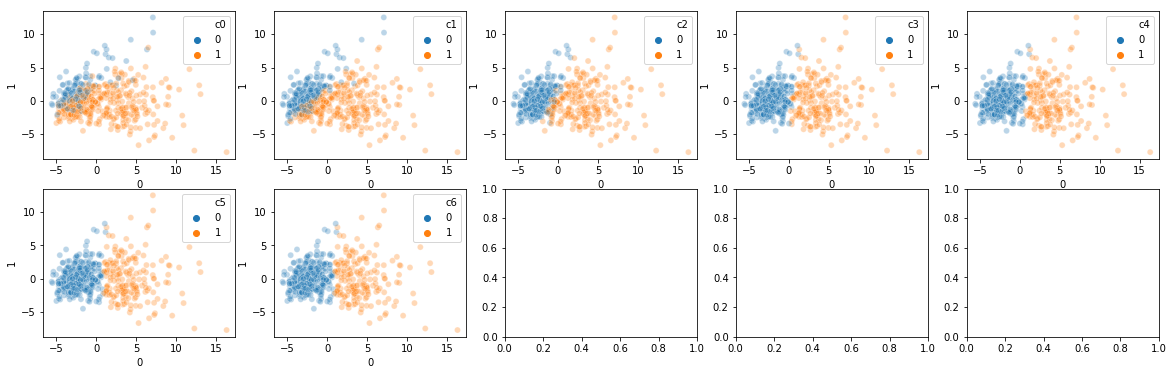

In [35]:
def kmeans_plot(data=data_pca, n_components=6, colnum=5):  
    plotnum = data.shape[1] - n_components
    rownum = math.ceil(plotnum / colnum)
    fig, ax = plt.subplots(rownum, 5, figsize=(4*colnum, 
                                               3*rownum))
    for i in range(plotnum):
        sns.scatterplot(x=0, y=1, data=data, 
                        hue='c'+str(i), hue_order=[0, 1],
                        alpha=0.3,
                        ax=ax[math.floor(i/colnum), 
                              i-math.floor(i/colnum)*5]
                       );
kmeans_plot()

true benign: 0.5992970123022847 
true malignant: 0.3110720562390158 
overall accuracy: 0.9103690685413005


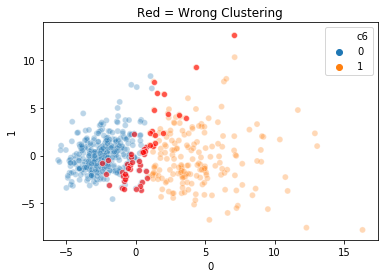

In [36]:

colname = data_pca.columns.tolist()[-1]
data_pca['diagnosis'] = target

# true negtive, true positive
true_B = data_pca[(data_pca['diagnosis']=='B') & 
                  (data_pca[colname]==0)].shape[0] / data_pca.shape[0]
true_M = data_pca[(data_pca['diagnosis']=='M') & 
                  (data_pca[colname]==1)].shape[0] / data_pca.shape[0]
print('true benign:', true_B,
      '\ntrue malignant:', true_M,
      '\noverall accuracy:', true_B+true_M)

# plot wrong data points
condition = (((data_pca['diagnosis']=='B') & (data_pca[colname]==1)) |
             ((data_pca['diagnosis']=='M') & (data_pca[colname]==0))
            )
sns.scatterplot(x=0, y=1, data=data_pca, 
                hue=colname, hue_order=[0, 1],
                alpha=0.3
               );
sns.scatterplot(x=0, y=1, data=data_pca[condition], 
                color='r', alpha=0.6
               );
ax = plt.gca()
ax.set_title("Red = Wrong Clustering");

data_pca.drop('diagnosis', axis=1, inplace=True)

# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to **check how accurate your clustering was**. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.

In [0]:
# did it in the previous code blocks

# Try to use the function in the lecture notebook

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html   
`scipy.spatial.distance.cdist(XA, XB, metric='euclidean', *args, **kwargs)``   
Compute distance between each pair of the two collections of inputs.  

In [0]:
# this is the function in the lecture notebook
import math
import numpy as np
from scipy.spatial import distance

# Calculate the Nearest Centroid to each data point
def find_nearest_centroid(df, centroids, iteration):
    # calculate the distances between each point and each centroid
    distances = distance.cdist(df, centroids, 'euclidean')
  
    # Get nearest centroid to each point based on distance
    nearest_centroids = np.argmin(distances, axis=1)

    se = pd.Series(nearest_centroids)
    df['cluster_'+iteration] = se.values
  
    return df

def get_centroids(df, column_header):
    centroids = df.groupby(column_header).mean()
    return centroids

In [139]:
df.columns[:10]

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean'],
      dtype='object')

https://colab.research.google.com/drive/1MKiRgWrCR9GQRuh9S7zDX4CgwxAwgA66?authuser=2#scrollTo=dW1AeAK8PNah&line=4&uniqifier=1   
From the pairplot, we eyeballed some column combinations might yield better clustering result, e.g. radius_mean and smoothness_mean

In [161]:
# choose 2 columns, aka features
# unfortunately function find_nearest_centroid() uses scipy.spatial.distance.cdist()
# so you are allowed to use only 2 columns, or you will get errors
cols = ['radius_mean', 'smoothness_mean', 'perimeter_mean']

# it is a labelled dataset, we could easily tell k=2 would be a good choice.
k = 2

# randomly choose two points as initial centroids
samples = df[cols].sample(k)
print('samples shape:', samples.shape)
c0 = samples.T.values.tolist()
centroids_0 = samples.values.tolist()
print(centroids_0)

# we chose 3 columns, so the centroids are 2 points in a 3D place

samples shape: (2, 3)
[[15.5, 0.11199999999999999, 102.9], [9.72, 0.0695, 60.73]]


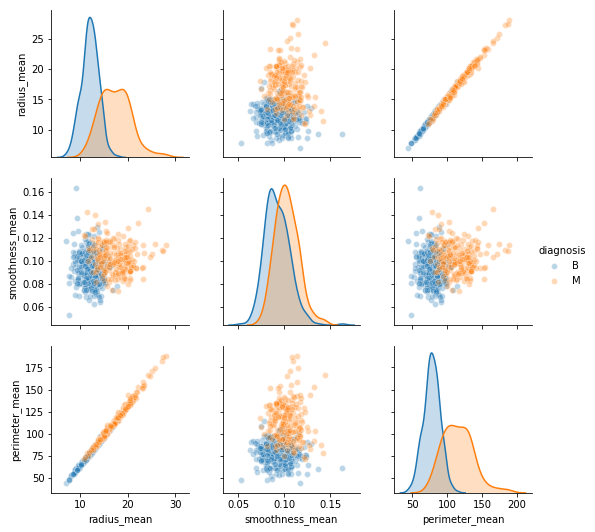

In [175]:
sns.pairplot(df[cols+['diagnosis']], hue='diagnosis',
             hue_order=['B', 'M'], plot_kws={'alpha':0.3});

https://plot.ly/python/3d-scatter-plots/   

In [163]:
fig = go.Figure(data=[
    go.Scatter3d(
        x=df[cols[0]],
        y=df[cols[1]],
        z=df[cols[2]],
        mode='markers',
        marker=dict(
            size=4,
            color='gray',
            opacity=0.5)),
    go.Scatter3d(
        x=c0[0],
        y=c0[1],
        z=c0[2],
        mode='markers',
        marker=dict(
            size=5,
            color='blue',
            opacity=0.9)),        
])
fig.update_layout(
    title=go.layout.Title(text="K-Means: Initial Centroids",
                          y=0.9),
    margin=dict(l=0, r=0, b=5, t=0),
    width=500, height=500,
    scene={"xaxis":{"title":cols[0]},
           "yaxis":{"title":cols[1]},
           "zaxis":{"title":cols[2]},
          },
    showlegend=False,
)
fig.show()

In [164]:
iteration_1 = find_nearest_centroid(df[cols], centroids_0, '1')
iteration_1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,radius_mean,smoothness_mean,perimeter_mean,cluster_1
0,17.99,0.11840,122.80,0
1,20.57,0.08474,132.90,0
2,19.69,0.10960,130.00,0
3,11.42,0.14250,77.58,1
4,20.29,0.10030,135.10,0


In [165]:
# get new centroids
centroids_1 = get_centroids(iteration_1, 'cluster_1')
c1 = centroids_1.T.values.tolist()
print(centroids_1.values.tolist())
centroids_1

[[16.131686046511636, 0.09738529069767445, 105.73479651162792], [11.062795555555551, 0.09479315555555556, 70.92271111111108]]


,radius_mean,smoothness_mean,perimeter_mean
cluster_1,,,
0,16.131686,0.097385,105.734797
1,11.062796,0.094793,70.922711


In [170]:
df1 = iteration_1[iteration_1['cluster_1']==1]
df2 = iteration_1[iteration_1['cluster_1']==0]

fig = go.Figure(data=[
    go.Scatter3d(
        x=df1[cols[0]],
        y=df1[cols[1]],
        z=df1[cols[2]],
        mode='markers',
        marker=dict(
            size=4,
            color='deepskyblue',
            opacity=0.4)),
    go.Scatter3d(
        x=df2[cols[0]],
        y=df2[cols[1]],
        z=df2[cols[2]],
        mode='markers',
        marker=dict(
            size=4,
            color='orange',
            opacity=0.4)),    
    go.Scatter3d(
        x=c1[0],
        y=c1[1],
        z=c1[2],
        mode='markers',
        marker=dict(
            size=5,
            color='blue',
            opacity=0.9)),        
])
fig.update_layout(
    title=go.layout.Title(text="K-Means: Centroids, 1st Iteration",
                          y=0.9),
    margin=dict(l=0, r=0, b=5, t=0),
    width=500, height=500,
    scene={"xaxis":{"title":cols[0]},
           "yaxis":{"title":cols[1]},
           "zaxis":{"title":cols[2]},
          },
    showlegend=False,
)
fig.show()

# A demo of K-Means clustering on the handwritten digits data

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py 

n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.35s	69432	0.602	0.650	0.625	0.465	0.621	0.146
random   	0.25s	69694	0.669	0.710	0.689	0.553	0.686	0.147
PCA-based	0.05s	70804	0.671	0.698	0.684	0.561	0.681	0.118
__________________________________________________________________________________


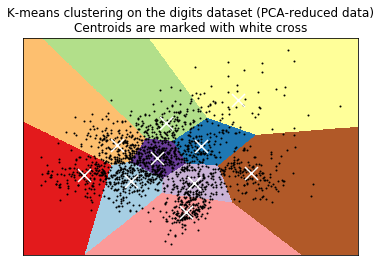

In [39]:
# %%writefile plot_kmeans_digits.py
"""
===========================================================
A demo of K-Means clustering on the handwritten digits data
===========================================================

In this example we compare the various initialization strategies for
K-means in terms of runtime and quality of the results.

As the ground truth is known here, we also apply different cluster
quality metrics to judge the goodness of fit of the cluster labels to the
ground truth.

Cluster quality metrics evaluated (see :ref:`clustering_evaluation` for
definitions and discussions of the metrics):

=========== ========================================================
Shorthand    full name
=========== ========================================================
homo         homogeneity score
compl        completeness score
v-meas       V measure
ARI          adjusted Rand index
AMI          adjusted mutual information
silhouette   silhouette coefficient
=========== ========================================================

"""
# print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_,
                                                average_method='arithmetic'),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()